In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris


In [6]:

def analyze_dataset(X, y):
    # Load the Iris dataset from scikit-learn
    iris = load_iris()
    feature_names = iris.feature_names
    target_names = iris.target_names

    # Create a dictionary to store the univariate analysis results
    univariate_results = {}

    # Perform univariate analysis for each feature
    for i in range(X.shape[1]):
        feature_name = feature_names[i]
        feature_data = X[:, i]
        
        # Create a histogram of the feature data
        plt.hist(feature_data, bins=10)
        plt.xlabel(feature_name)
        plt.ylabel('Count')
        plt.title("histogram of the feature data")
        plt.show()
        
        
        # Create a kernel density estimate plot of the feature data
        sns.kdeplot(feature_data)
        plt.xlabel(feature_name)
        plt.ylabel('Density')
        plt.title("kernel density estimate plot of the feature data")
        plt.show()
        
        # Create a box plot of the feature data
        sns.boxplot(x=feature_data)
        plt.xlabel(feature_name)
        plt.title("box plot of the feature data")
        plt.show()
        
        # Store the univariate analysis results in the dictionary
        univariate_results[feature_name] = {
            'mean': feature_data.mean(),
            'median': np.median(feature_data),
            'std': feature_data.std(),
            'min': feature_data.min(),
            'max': feature_data.max()
        }

    # Create a scatter matrix of the features
    sns.pairplot(pd.DataFrame(X, columns=feature_names))
    plt.suptitle("scatter matrix of the features")
    plt.show()

    # Create a correlation matrix of the features
    corr = np.corrcoef(X.T)
    sns.heatmap(corr, cmap='coolwarm', annot=True, xticklabels=feature_names, yticklabels=feature_names)
    plt.title("correlation matrix of the features")
    plt.show()

    # Perform multivariate analysis using PCA
    from sklearn.decomposition import PCA

    # Create a PCA object with 2 components
    pca = PCA(n_components=2)

    # Fit the PCA model to the data
    pca.fit(X)

    # Transform the data to the first 2 principal components
    X_pca = pca.transform(X)

    # Create a scatter plot of the first 2 principal components, colored by target label
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
    plt.xlabel('PCA component 1')
    plt.ylabel('PCA component 2')
    plt.title("catter plot of the first 2 principal components, colored by target label")
    plt.show()

    # Print the univariate analysis results
    print('Univariate analysis results:')
    for feature_name, result in univariate_results.items():
        print(feature_name)
        print('Mean:', result['mean'])
        print('Median:', result['median'])
        print('Standard deviation:', result['std'])
        print('Min:', result['min'])
        print('Max:', result['max'])
        print()


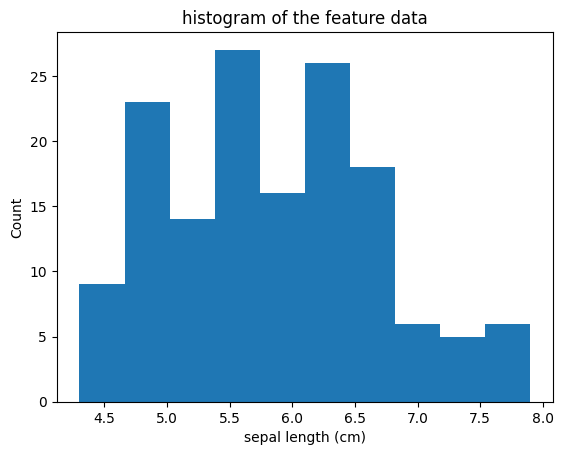

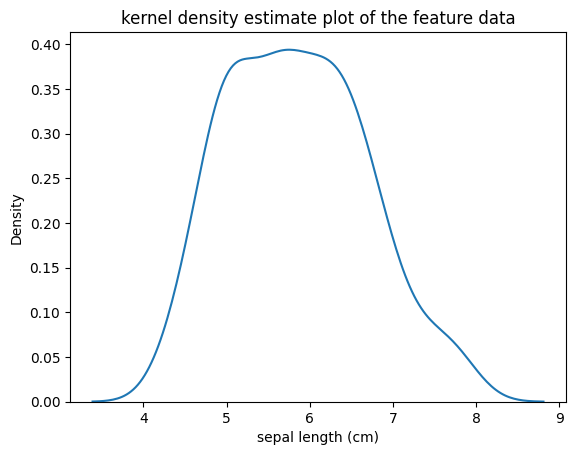

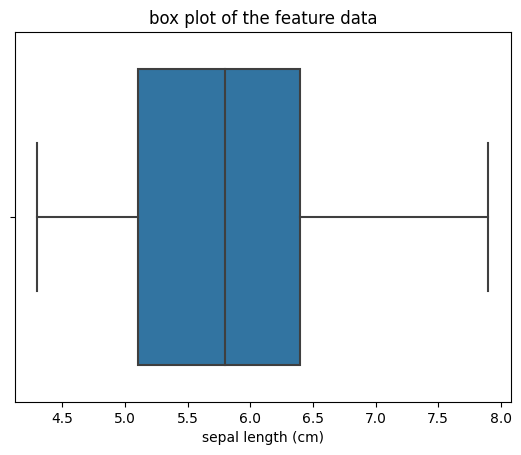

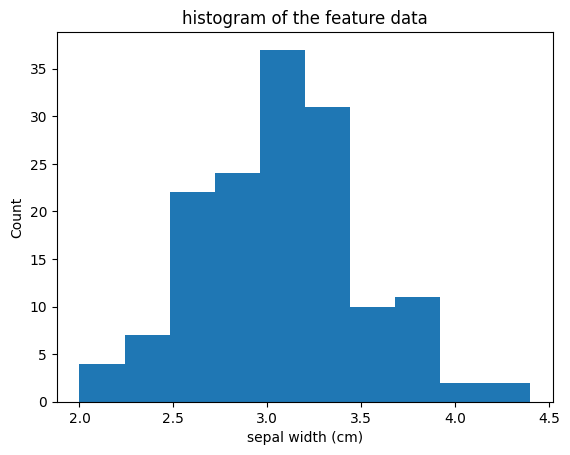

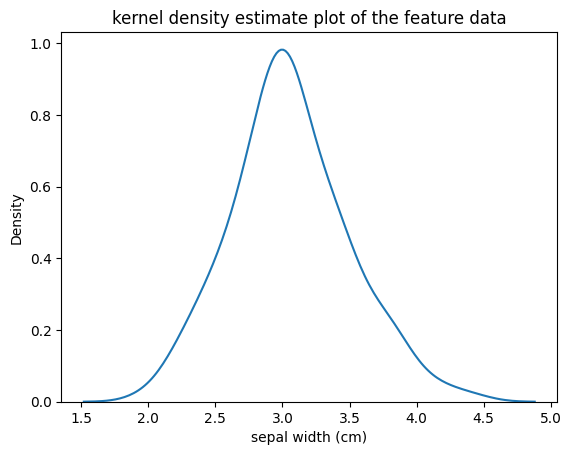

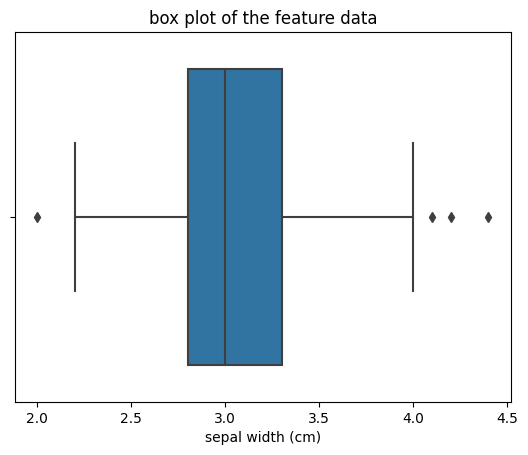

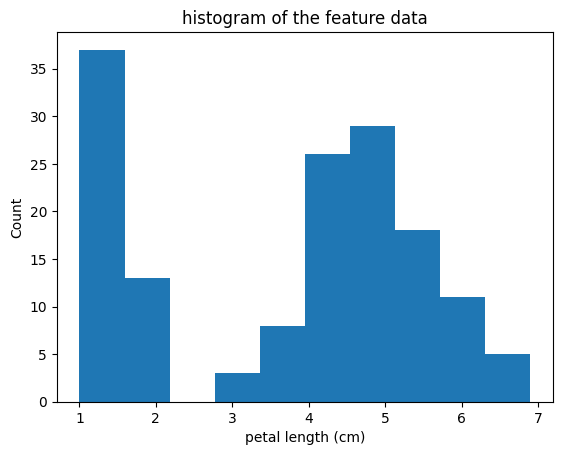

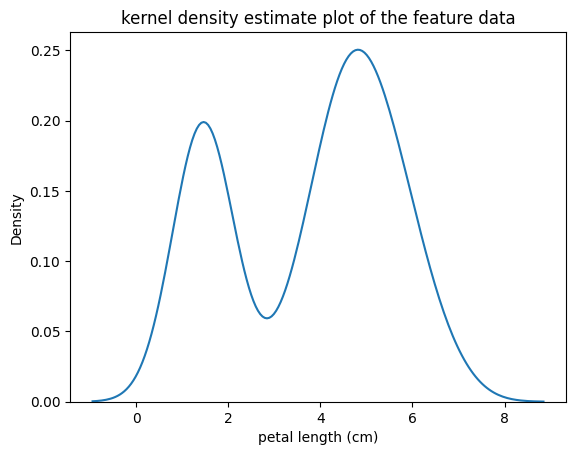

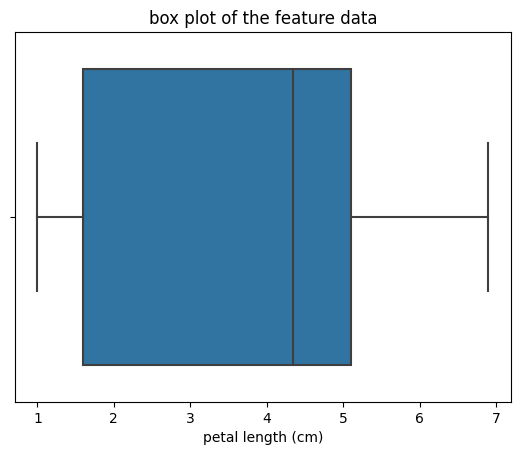

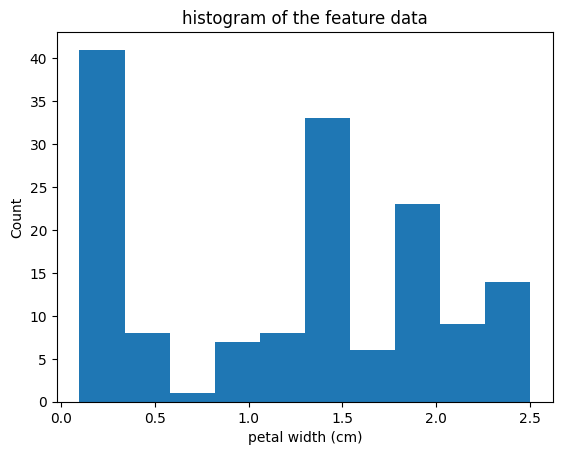

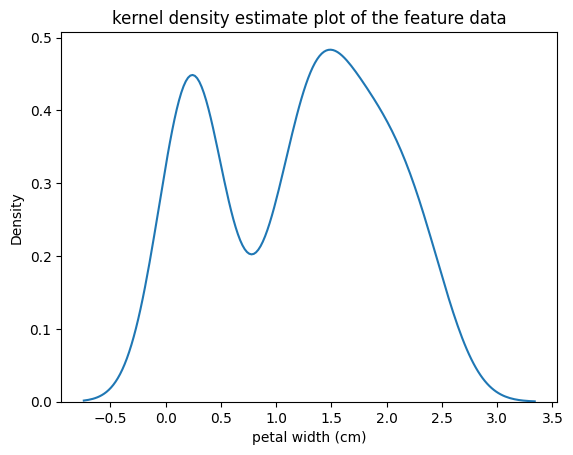

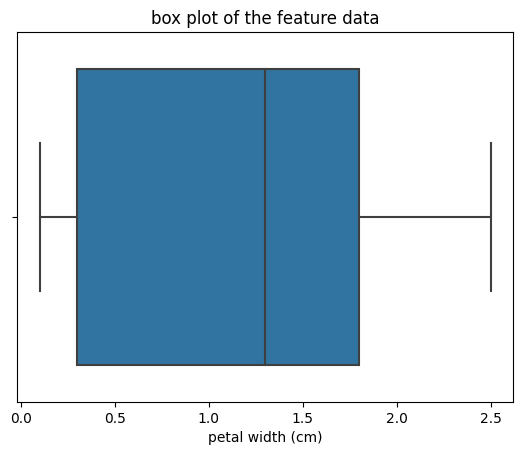

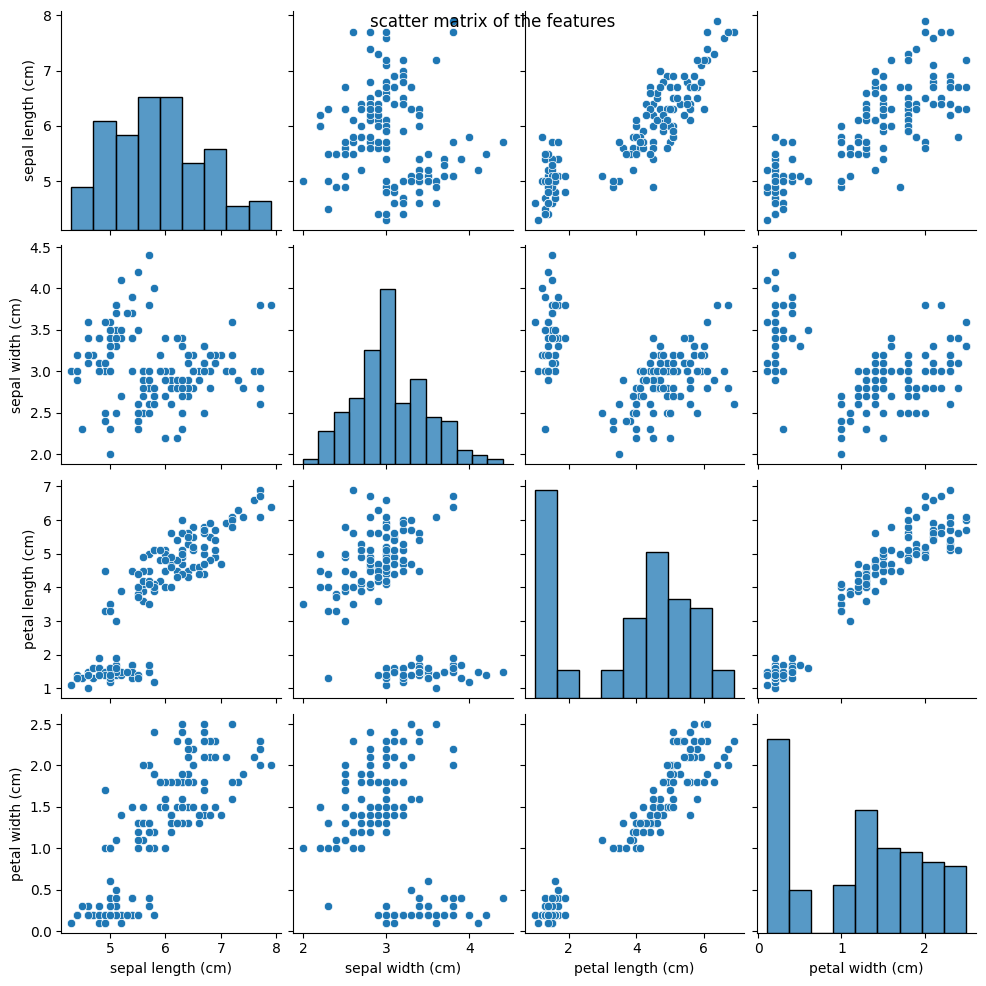

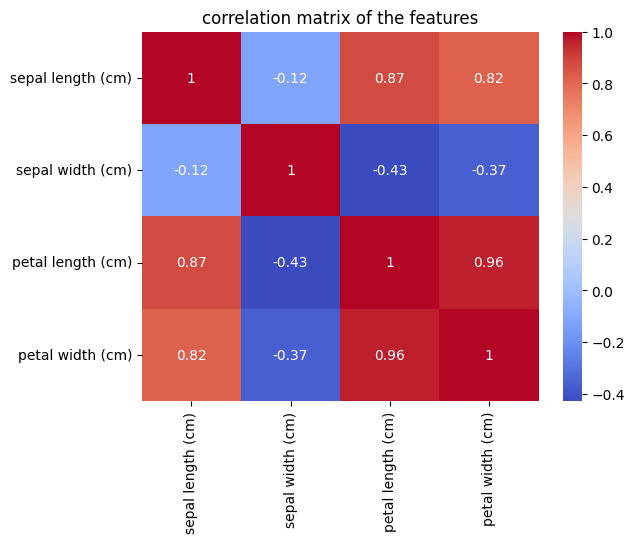

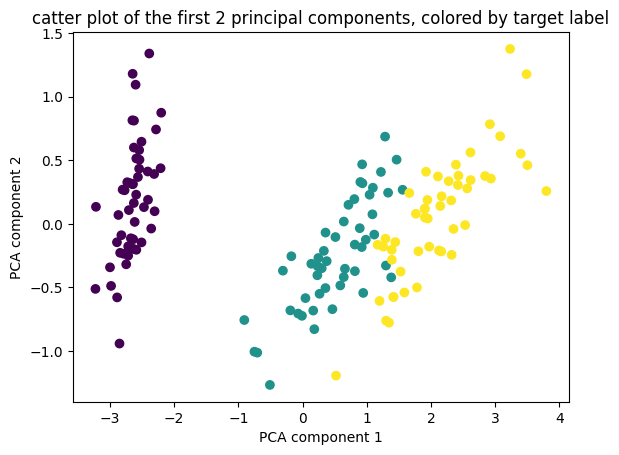

Univariate analysis results:
sepal length (cm)
Mean: 5.843333333333334
Median: 5.8
Standard deviation: 0.8253012917851409
Min: 4.3
Max: 7.9

sepal width (cm)
Mean: 3.0573333333333337
Median: 3.0
Standard deviation: 0.4344109677354946
Min: 2.0
Max: 4.4

petal length (cm)
Mean: 3.7580000000000005
Median: 4.35
Standard deviation: 1.759404065775303
Min: 1.0
Max: 6.9

petal width (cm)
Mean: 1.1993333333333336
Median: 1.3
Standard deviation: 0.7596926279021594
Min: 0.1
Max: 2.5



In [7]:
iris = load_iris()
X = iris.data
y = iris.target

analyze_dataset(X, y)